# I.<u> Régression Logistique </u>


La régression logistique est l'un des algorithmes d'apprentissages supérvisés, les plus simples, les plus utilisées pour la classification à deux classes.

La régression logistique est la référence de tout problème de classification binaire.

Sa base d'apprentissage : $X$ = {($x_1,y_1$), ($x_2,y_2$),...,($x_n,y_n$)}     

Avec 
 * $x_i$ est un vecteur objet réel de p attributs.
 * $y_i$ sortie binaire {0,1}
 
      
 ### Principe : 
  
La régression logistigue consiste à estimer la probabilité de succès c-à-d la probabilité conditionnelle d'avoir $y_i = 1$ sachant $x_i$, en utilisant la fonction de sigmoid : $p(y_i = 1 /x_i) = \frac{1}{1+exp(- w* x_i)}$
  
Avec $w = w_0, w_1,....,w_p$ : l'inconnue , se sont les poids à apprendre à partir des données de la base d'apprentissage.
  
  ### La Forme générale de la probabilité conditionnelle
  
  $$p(y_i/x_i,w) = (\frac{1}{1+exp(- w* x_i)})^{y_i} * (1- \frac{1}{1+exp(- w* x_i)})^{(1-y_i)}$$
  
  c'est la loi de **Bernoulli**
  
   
   ###  Critère à minimiser 
   
   La plupart des algorithmes d'apprentissages possèdent des critères à optimiser pour atteindre la sotrie désirée.
   Dans la régression logistique c'est l'accross_entropie  qui est définie par : 
   $J(w) = -log(V(w))$ = $\sum_{i = 1}^{n}e_i$
   
   Avec      :  $$V(w)= \prod_{i = 1}^{n}p(y_i / x_i ;w)$$ quelque soit i.
   
   et $$ei = -y_i * log(\frac{1}{1+exp(- w* x_i)}) - (1-y_i)* log(1- \frac{1}{1+exp(- w* x_i)})$$
   
   ###   Règle d'apprentissage 
   
   La règle d'apprentissage est s'écrit d'une manière générale par : 
   $$w_j(t) = w_j(t-1) - \alpha * \frac {\partial J(w)}{\partial w_j}$$
   
   Après calcul du $\frac {\partial J(w)}{\partial w_j}$ on obtient : $$\sum_{i=1}^{n}(\frac{1}{1+exp(- w* x_i)}-y_i)*x_ij$$ quelque soit j.
   
   D'où $$w_j(t) = w_j(t-1) - \alpha * \sum_{i=1}^{n}(\frac{1}{1+exp(- w* x_i)}-y_i)*x_ij$$ quelque soit j.
   
   $\alpha$ : le pas d'apprentissage.
   
   
   
   
  
  





# II. <u>Implémentation de la RegLog </u>

###### Partie déclarative:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import siam as sm
from sklearn.model_selection import train_test_split


######   Lecture des données :

In [3]:
dataSet = "../data/x1.txt"
with open(dataSet,"r") as f:
    n = int(f.readline())
    p = int(f.readline())
X = np.loadtxt(dataSet,skiprows=2,usecols=range(p))
y = np.loadtxt(dataSet,skiprows=2,usecols=p)
y = y.reshape(y.shape[0],1) #vecteur de sortie y
bias = np.ones((X.shape[0],1))
x = np.concatenate((bias,X),axis=1) #Matrice x

###### Séparation des données

In [4]:
x1, x2, y1, y2 = train_test_split(x, y, test_size=0.3)

###### Initialisation des poids

In [5]:
t,tmax = 0,30000
alpha,eps = 0.001,0.00001
#np.random.seed(0)            # pour générer les memes nombres
w = np.random.randn(p+1,1)
pi1 = 1/(1 + np.exp(- x1 @ w))
print("les poids initiaux : ",w)
print('cout initial: ',sm.fcout(y1,pi1))

les poids initiaux :  [[ 1.65372077]
 [-2.27921986]
 [-0.59256285]]
cout initial:  [[125.22048505]]


###### Boucle d'apprentissage

In [6]:
while (t < tmax ): #and diff(oldw,w) > eps):
    t += 1
    pi1 = 1/(1 + np.exp(- x1 @ w)) # A@B :(produit scalaire entre A B)
    delta = x1.T @ (pi1 - y1)  # DGC
    w = w - (alpha * delta)
print("les poids finaux : ",w)   
print('cout final: ',sm.fcout(y1,pi1))

les poids finaux :  [[-10.20551023]
 [  5.87322208]
 [ -2.66109562]]
cout final:  [[0.8776106]]


Text(0, 0.5, 'X2')

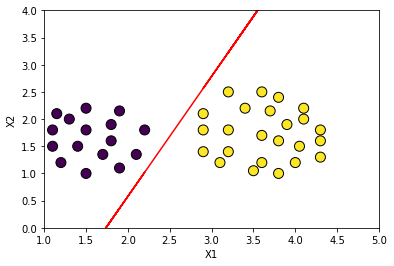

In [18]:
X1 = X[:,0]
X2 = X[:,1]
plt.scatter(X1,X2,s=100,c=y[:,0],edgecolors='k')
xx = [-(w[0] + w[1]*X1[i])/w[2] for i in range(40)]
plt.plot(X1,xx,c='r')
plt.axis([1,5,0,4])
plt.xlabel("X1")
plt.ylabel("X2")

###### Généralisation

In [19]:
yhat1=pi1>=0.5
s = sm.score(y1,yhat1)
print("score de la base d'apprentissage:",s,'%')
pi2 = 1/(1 + np.exp(- x2 @ w))
yhat2=pi2>=0.5
s = sm.score(y2,yhat2)
print('score de la base de test:',s,'%')

score de la base d'apprentissage: 100.0 %
score de la base de test: 100.0 %
